In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
from scipy import stats

In [2]:
filename = 'Lab1.xlsx'
sheetName = 'Energia - kanał'
calibrationData = pd.read_excel(filename, sheet_name = sheetName)
print('Dane z kalibracji: ')

Dane z kalibracji: 


In [3]:
plt.style.use(['science', 'notebook', 'grid'])

C:\Users\szcis\AppData\Local\Temp\ipykernel_11144\972979038.py:11: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend('Punkty pomiarowe', 'Dopasowana prosta')


LinregressResult(slope=0.33917651258913645, intercept=-4.97995217328409, rvalue=0.9999974456667681, pvalue=9.786919056588377e-12, stderr=0.00038331020468044863, intercept_stderr=0.3150066801022376)

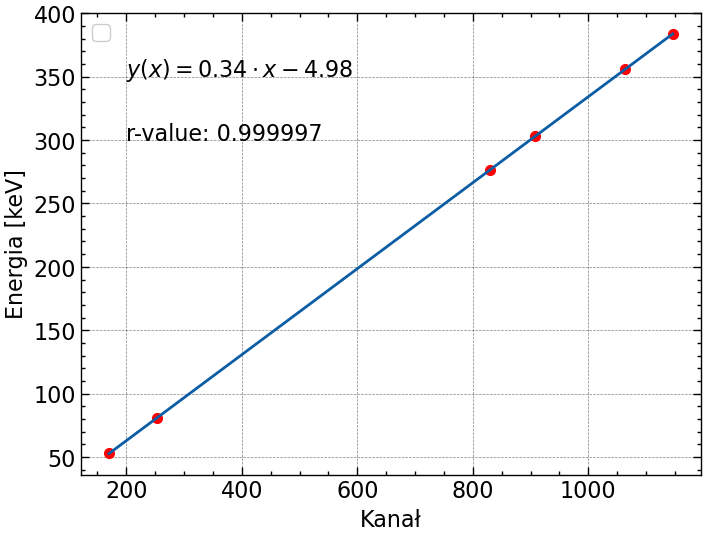

In [4]:
CEnergy = calibrationData.loc[0:6, 'En']
CChannel = calibrationData.loc[0:6, 'Channel']

linFit = stats.linregress(CChannel, CEnergy)

fig, ax = plt.subplots(1, 1)
ax.plot(CChannel, CEnergy, 'o', color='red', label='punkty pomiarowe', ms=7)
ax.plot(CChannel, linFit.slope*CChannel+linFit.intercept)
ax.set_xlabel('Kanał')
ax.set_ylabel('Energia [keV]')
ax.legend('Punkty pomiarowe', 'Dopasowana prosta')
ax.text(200, 350, r'$y(x) = 0.34\cdot x - 4.98$', fontsize = 16)
ax.text(200, 300, f'r-value: {round(linFit.rvalue, 6)}', fontsize = 16)

linFit

In [26]:
americiumData = np.loadtxt('Am241.TKA')
bariumData = np.loadtxt('Ba133.TKA')
sodiumData = np.loadtxt('Na22.TKA')
caesiumData = np.loadtxt('cez137.TKA')
cobaltData = np.loadtxt('Co60.TKA')
unknownData = np.loadtxt('nieznana.TKA')

In [6]:
np.arange(len(americiumData))

array([   0,    1,    2, ..., 8189, 8190, 8191])

58.78523219347356

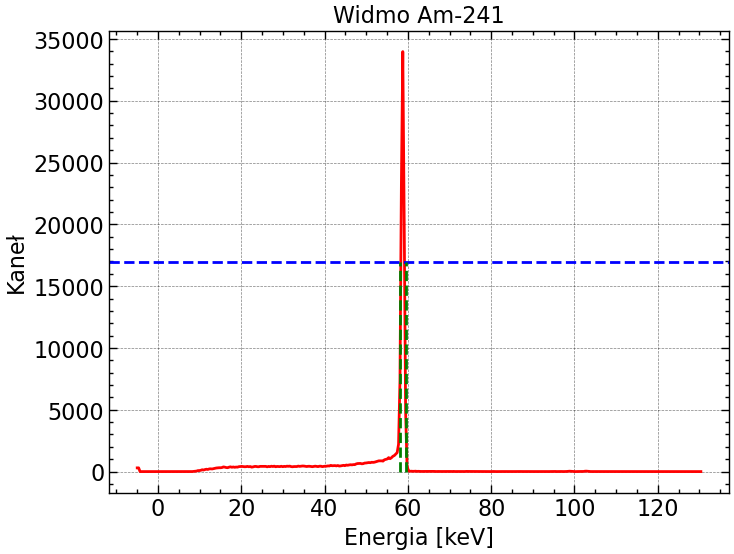

In [75]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(400)*linFit.slope + linFit.intercept, americiumData[:400], color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.set_title(r'Widmo Am-241')


max_index = np.argmax(americiumData)
maxValue = americiumData[max_index]
half_max_value = maxValue / 2

# Szukanie punktów z wartością najbliższą połowie maksimum po obu stronach peaku
# Znajdź najbliższe wartości z lewej i prawej strony maksymalnego peaku
left_index = np.where(americiumData[:max_index] <= half_max_value)[0][-1]
right_index = max_index + np.where(americiumData[max_index:] <= half_max_value)[0][0]

# Konwersja indeksów na wartości energii przy użyciu dopasowania liniowego
left_energy = left_index * linFit.slope + linFit.intercept
right_energy = right_index * linFit.slope + linFit.intercept

# Obliczenie FWHM
fwhm = right_energy - left_energy

# Wykres z oznaczeniem szerokości w połowie wysokości
ax.axhline(half_max_value, color='blue', linestyle='--', label=f'Połowa wartości szczytu ({half_max_value:.2f})')
ax.vlines([left_energy, right_energy], ymin=0, ymax=half_max_value, color='green', linestyle='--', label=f'FWHM = {fwhm:.2f} keV')
max_index*linFit.slope + linFit.intercept


17892.0

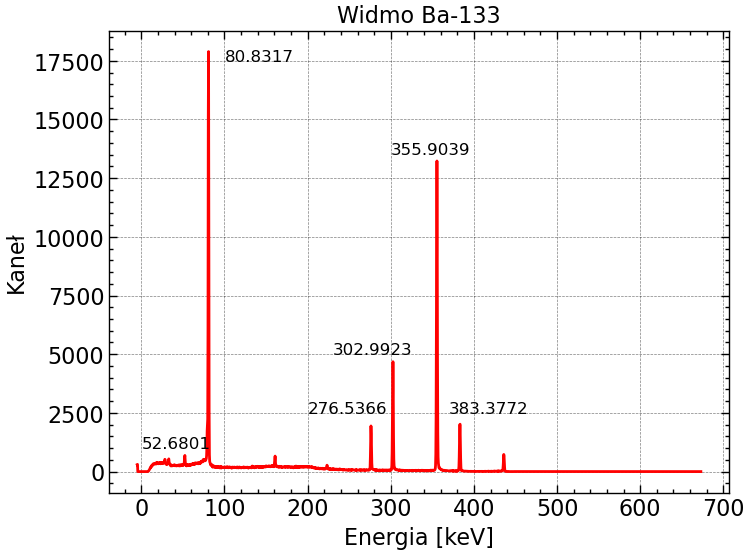

In [ ]:
peaks = np.array([170, 253, 1064, 908, 1145, 830])
peaks = linFit.slope*peaks + linFit.intercept

fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(2000)*linFit.slope + linFit.intercept, bariumData[:2000], color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.text(0, 1000, f'{round(peaks[0], 4)}', fontsize = 12)
ax.text(100, 17500, f'{round(peaks[1], 4)}', fontsize = 12)
ax.text(300, 13500, f'{round(peaks[2], 4)}', fontsize = 12)
ax.text(230, 5000, f'{round(peaks[3], 4)}', fontsize = 12)
ax.text(370, 2500, f'{round(peaks[4], 4)}', fontsize = 12)
ax.text(200, 2500, f'{round(peaks[5], 4)}', fontsize = 12)
ax.set_title('Widmo Ba-133')
np.mean(peaks/[170, 253, 1064, 908, 1145, 830])



(475.31395747160303, 659.4668359888342)

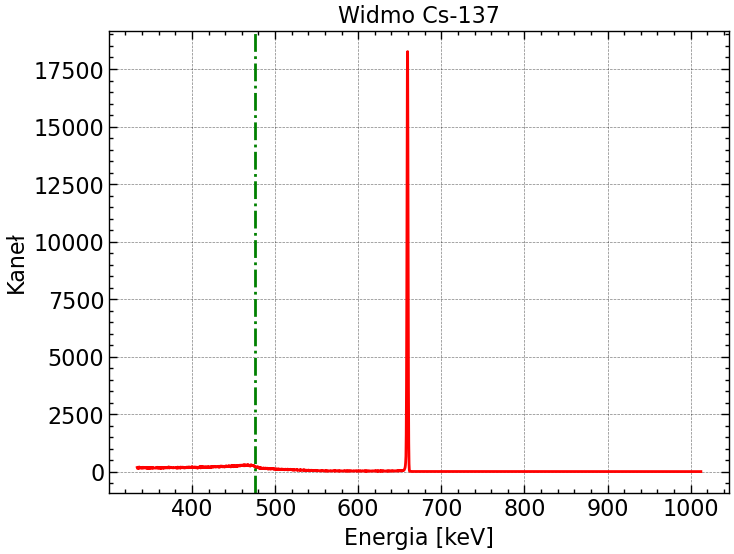

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(1000,3000)*linFit.slope + linFit.intercept, caesiumData[1000:3000], color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.set_title('Widmo Cs-137')


max_index = np.argmax(caesiumData)
maxValue = caesiumData[max_index]
energy = max_index*linFit.slope + linFit.intercept
comptonLimit = (2*energy**2)/(2*energy+511)
ax.axvline(x=comptonLimit, color = 'green', linestyle = '-.')
comptonLimit, energy

array([1169.58831092, 1327.9837423 ])

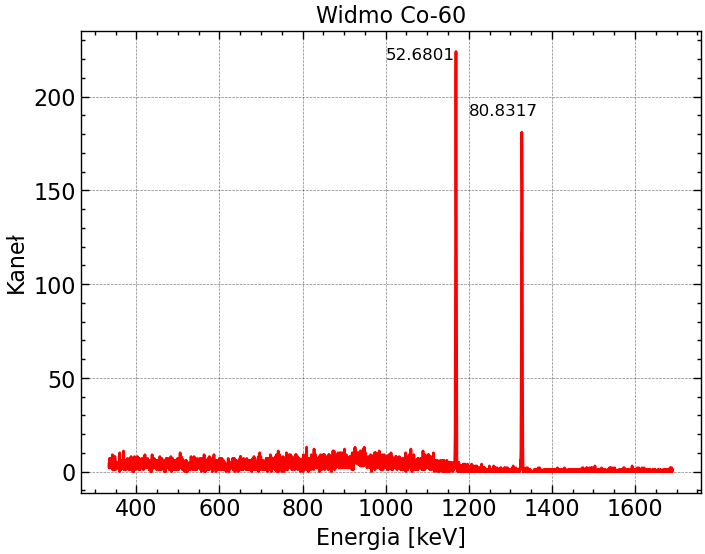

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(1000, 5000)*linFit.slope + linFit.intercept, cobaltData[1000:5000], color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.text(1000, 220, f'{round(peaks[0], 4)}', fontsize = 12)
ax.text(1200, 190, f'{round(peaks[1], 4)}', fontsize = 12)
ax.set_title('Widmo Co-60')


peaks = np.array([3463, 3930])
peaks = linFit.slope*peaks + linFit.intercept
peaks

array([ 509.88999394, 1270.32373516])

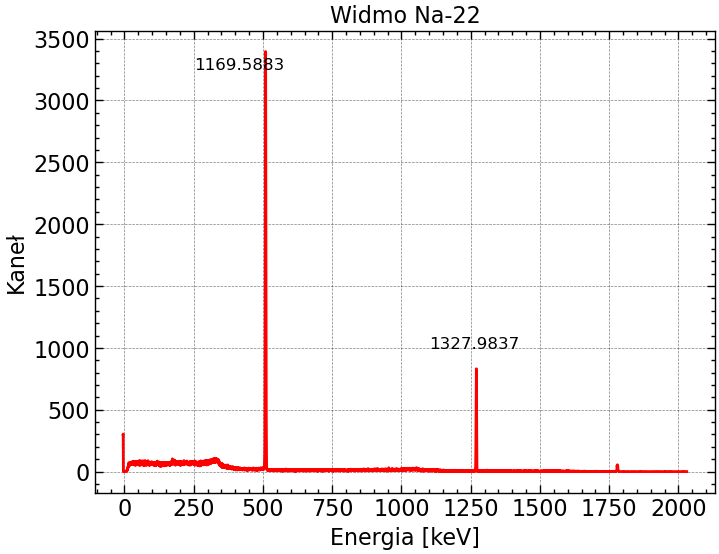

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(6000)*linFit.slope + linFit.intercept, sodiumData[:6000], color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.text(250, 3250, f'{round(peaks[0], 4)}', fontsize = 12)
ax.text(1100, 1000, f'{round(peaks[1], 4)}', fontsize = 12)
ax.set_title('Widmo Na-22')



peaks = np.array([1518, 3760])
peaks = linFit.slope*peaks + linFit.intercept
peaks

LinregressResult(slope=0.0014580842331386433, intercept=0.8651212276644467, rvalue=0.9889604283438528, pvalue=0.00139008616222367, stderr=0.00012613402507699833, intercept_stderr=0.034532121610370364)

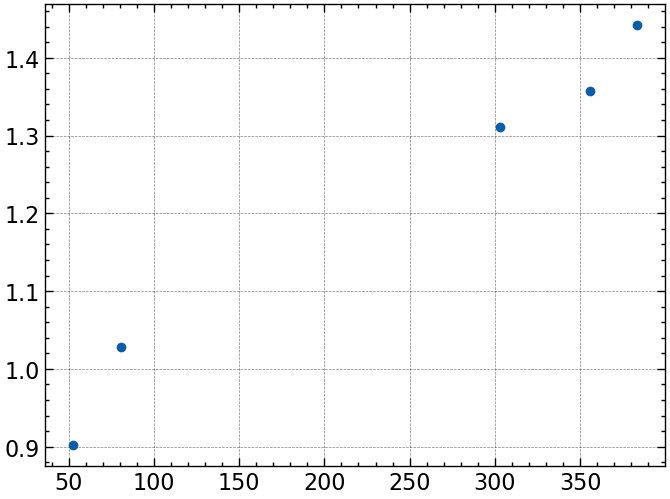

In [12]:
ens = [52.6801, 80.8317, 302.9923, 355.9039, 383.3772]
chns = np.array([170, 253, 830, 908, 1064, 1145])
fwhms = [0.902, 1.028, 1.311, 1.357, 1.442]
fit = stats.linregress(ens, fwhms)
plt.plot(ens, fwhms, 'o')
fit


In [16]:
constant = 0.9011
fwhms = np.array([0.872, 1.028, 1.311, 1.357, 1.993, 2.234, 2.585, 2.169, 1.744])
constant * fwhms

array([0.7857592, 0.9263308, 1.1813421, 1.2227927, 1.7958923, 2.0130574,
       2.3293435, 1.9544859, 1.5715184])

array([ 38.43464144, 122.21124005, 244.9931376 , 344.03267928])

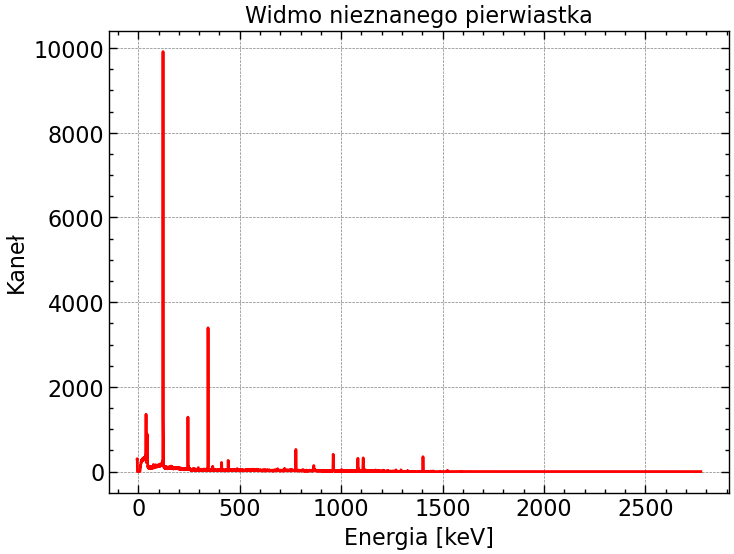

In [38]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(unknownData.size)*linFit.slope + linFit.intercept, unknownData, color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.set_title('Widmo nieznanego pierwiastka')
peaks = np.array([128, 375, 737, 1029])
peaks*linFit.slope + linFit.intercept

In [39]:
firstMangan = np.loadtxt('1.TKA')
secondMangan = np.loadtxt('2.TKA')
thirdMangan = np.loadtxt('3.TKA')
unknownMangan = np.loadtxt('x.TKA')

array([ 844.65721186, 1805.54427203, 2108.08972126])

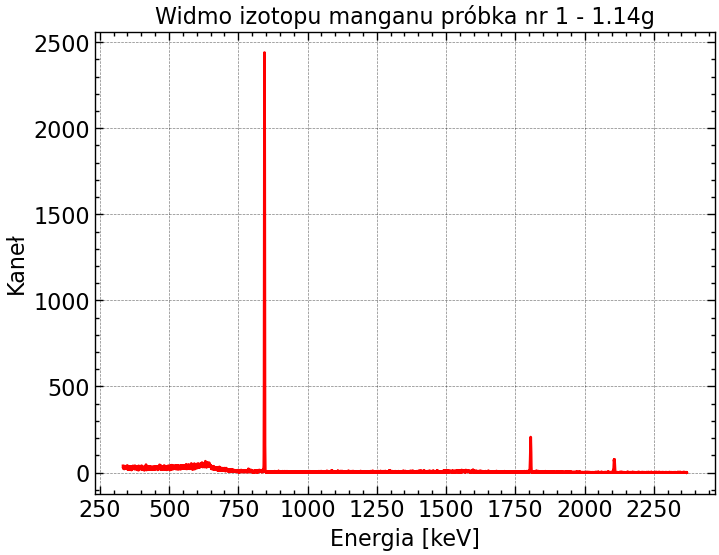

In [62]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(1000, 7000, 1)*linFit.slope + linFit.intercept, firstMangan[1000:7000], color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.set_title('Widmo izotopu manganu próbka nr 1 - 1.14g')
peaks = np.array([2505, 5338, 6230])
peaks*linFit.slope + linFit.intercept

array([ 844.65721186, 1805.54427203, 2108.08972126])

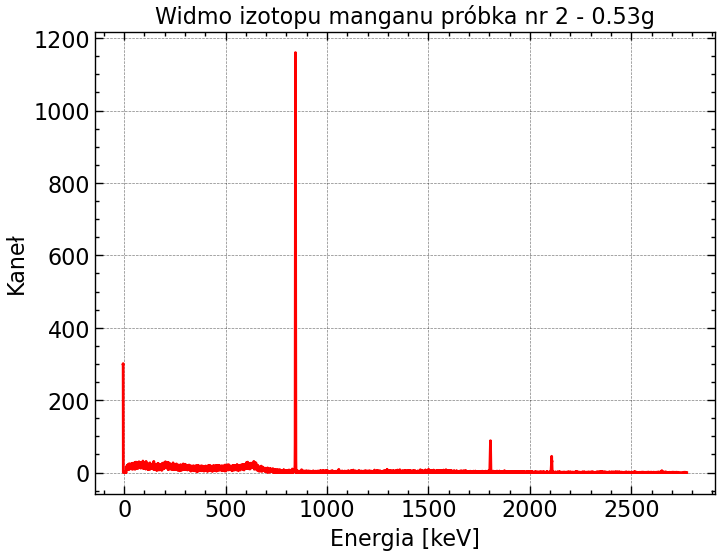

In [70]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(secondMangan.size)*linFit.slope + linFit.intercept, secondMangan, color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.set_title('Widmo izotopu manganu próbka nr 2 - 0.53g')
peaks = np.array([2505, 5338, 6230])
peaks*linFit.slope + linFit.intercept

array([ 844.65721186, 1805.54427203, 2108.08972126])

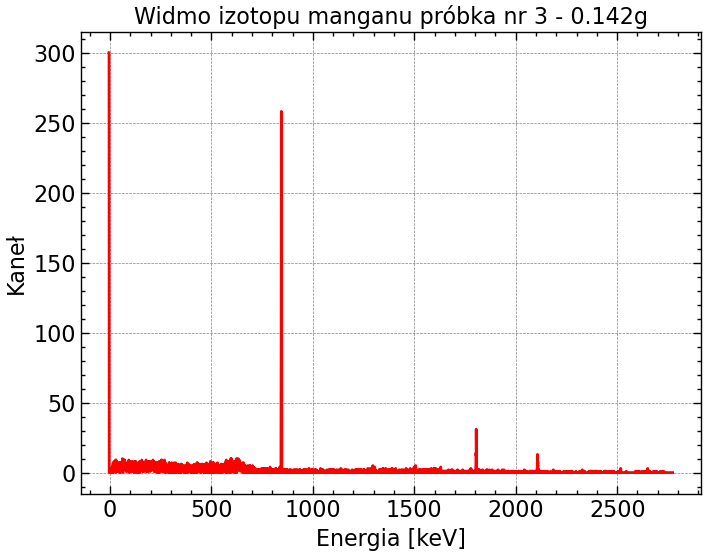

In [68]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(thirdMangan.size)*linFit.slope + linFit.intercept, thirdMangan, color  = 'red')
ax.set_xlabel('Energia [keV]')
ax.set_ylabel('Kaneł')
ax.set_title('Widmo izotopu manganu próbka nr 3 - 0.142g')
peaks = np.array([2505, 5338, 6230])
peaks*linFit.slope + linFit.intercept

0.7266

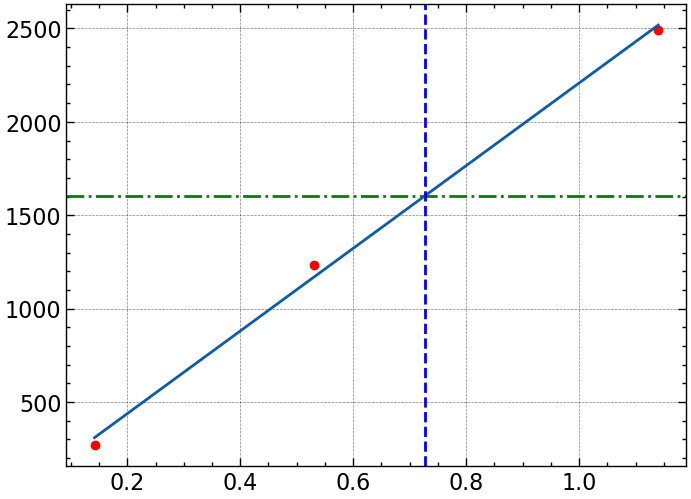

In [ ]:
masses = np.array([1.14, 0.53, 0.142])
n = np.array([2492, 1234, 269])
fit = stats.linregress(masses, n)
fig, ax = plt.subplots(1,1)
ax.plot(masses, n, 'o', color = 'red')
ax.plot(masses, masses*fit.slope + fit.intercept)
ax.axhline(y=1603, color = 'green', linestyle = '-.')
ax.set_title('Wykres ilości zliczeń od masy próbek manganu')
ax.set_xlabel('Masa [g]')
ax.set_ylabel('Ilość zliczeń')
ax.plot()
xMass = (1603 - fit.intercept)/fit.slope
ax.axvline(x=xMass, color = 'blue', linestyle = '--')
round(xMass, 4)
